In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files #Para subir los archivos al Colab

uploaded = files.upload()

Saving FACTURA.csv to FACTURA.csv
Saving CLIENTES.csv to CLIENTES.csv
Saving PRODUCTOS.csv to PRODUCTOS.csv


In [3]:
clientes = pd.read_csv("CLIENTES.csv")
clientes = clientes.rename(columns={'ID_FACTURA': 'ID_Factura'})
clientes

,ID_Cliente,ID_Factura
0,0,13359
1,0,4690
2,0,6498
3,0,24517
4,0,9937
...,...,...
21570,39,12463
21571,39,7923
21572,39,6982
21573,39,3168


In [4]:
factura = pd.read_csv("FACTURA.csv")
factura

,ID_Factura,Producto,Cantidad
0,10440,escaper,125
1,10440,lamina plastica,65
2,10440,escaper,145
3,10440,miniglide,142
4,10440,LCD 30hz pb23,56
...,...,...,...
131377,22157,earecho,42
131378,22157,LCD 60hz pldas,89
131379,22157,miniglide,107
131380,22157,Vidrio templado,82


In [5]:
productos = pd.read_csv("PRODUCTOS.csv",sep=";")
productos

,nombre,nombre_gen,tipo,precio,valoracion,garantia,Vida_util_mes
0,miniglide,Mouse,Periferico,20,3.0,0,5
1,TechRodent,Mouse,Periferico,32,2.5,0,7
2,Masterswipe,Mouse,Periferico,58,4.0,0,10
3,Mightyscroller,Mouse,Periferico,80,4.6,0,15
4,gizmoclick,Mouse,Periferico,70,4.8,0,20
5,typomaster,Teclado,Periferico,30,2.3,0,10
6,qwertyguardian,Teclado,Periferico,40,2.4,0,15
7,enterwizard,Teclado,Periferico,46,4.6,0,17
8,shiftmate,Teclado,Periferico,71,4.7,0,20
9,escaper,Teclado,Periferico,80,4.5,0,26


## **A.** Cantidad vendida por producto

In [6]:
FacturaC = factura.copy()
# Eliminar ID_Factura ya que no lo necesitamos
FacturaC = FacturaC.drop(['ID_Factura'], axis=1)

# Agrupar por producto y sumar la cantidad
FacturaC['Cantidad'] = FacturaC.groupby('Producto')['Cantidad'].transform('sum')

# Eliminar duplicados
FacturaC = FacturaC.drop_duplicates(subset=["Producto"])
FacturaC #Tabla con solo Producto y Cantidad vendida

,Producto,Cantidad
0,escaper,560877
1,lamina plastica,238862
3,miniglide,550930
4,LCD 30hz pb23,528444
5,silverscreen,387309
6,OLCD 60hz i3xaz,555414
8,laplux,388262
10,gizmoclick,543160
11,TechRodent,550905
12,QLED 60hz pb51,545249


In [7]:
FacturaC=FacturaC.sort_values('Cantidad',ascending=False) #Organizar de mayor producto vendido al menor
FacturaC

,Producto,Cantidad
0,escaper,560877
88,LCD 60hz pldas,558913
14,qwertyguardian,557531
17,typomaster,556431
6,OLCD 60hz i3xaz,555414
3,miniglide,550930
11,TechRodent,550905
36,QLED 60hz sd56,545894
19,Mightyscroller,545509
12,QLED 60hz pb51,545249


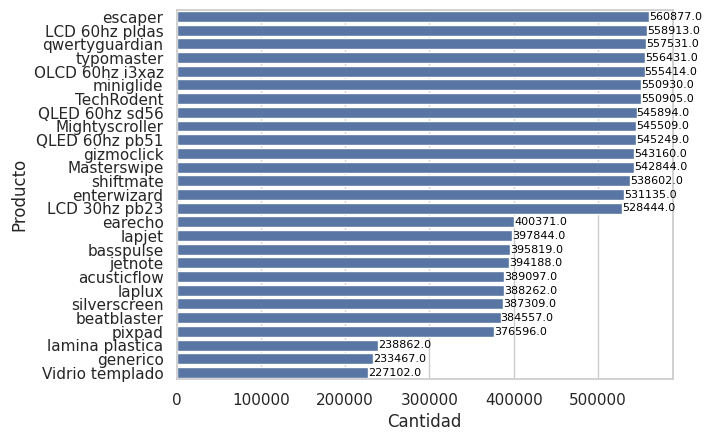

In [8]:
sns.set_theme(style="whitegrid") # estilo del gráfico utilizando Seaborn
ax = sns.barplot(FacturaC, x="Cantidad", y="Producto", orient="h") #gráfico de barras horizontal
for p in ax.patches: #para agregar etiquetas a cada barra
    width = p.get_width()
    ax.annotate(f'{width}', xy=(width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=8, color='black')

La grafica nos muestra la cantidad vendida de cada producto, emepzando desde el producto más vendido hasta llegar al menos vendido, como podemos ver el mas vendido es el escaper y el menos vendido es el vidrio templado

## **C.**  Cantidad vendida por categoria de producto

In [9]:
Categ = FacturaC.copy()
# Eliminar columnas innecesarias ya que no lo necesitamos de la tabla productos
prodE=productos.drop(['precio', 'valoracion','garantia','Vida_util_mes'], axis=1)

# Unificar el nombre de la columna para que concuerden las columnas de ambas tablas
prodE = prodE.rename(columns={'nombre': 'Producto'})
prodE

,Producto,nombre_gen,tipo
0,miniglide,Mouse,Periferico
1,TechRodent,Mouse,Periferico
2,Masterswipe,Mouse,Periferico
3,Mightyscroller,Mouse,Periferico
4,gizmoclick,Mouse,Periferico
5,typomaster,Teclado,Periferico
6,qwertyguardian,Teclado,Periferico
7,enterwizard,Teclado,Periferico
8,shiftmate,Teclado,Periferico
9,escaper,Teclado,Periferico


In [10]:
# Cruzamos las tablas
Tabla_Cr = pd.merge(Categ, prodE, on="Producto")
Tabla_Cr

,Producto,Cantidad,nombre_gen,tipo
0,escaper,560877,Teclado,Periferico
1,LCD 60hz pldas,558913,Monitor,Periferico
2,qwertyguardian,557531,Teclado,Periferico
3,typomaster,556431,Teclado,Periferico
4,OLCD 60hz i3xaz,555414,Monitor,Periferico
5,miniglide,550930,Mouse,Periferico
6,TechRodent,550905,Mouse,Periferico
7,QLED 60hz sd56,545894,Monitor,Periferico
8,Mightyscroller,545509,Mouse,Periferico
9,QLED 60hz pb51,545249,Monitor,Periferico


# Si categoria de producto se refiere al tipo


In [11]:
Tabla_CrC = Tabla_Cr.copy()
# Eliminar ID_Factura
Tabla_CrC = Tabla_CrC.drop(['Producto','nombre_gen'], axis=1)

# Agrupar por tipo y sumar la cantidad
Tabla_CrC['Cantidad'] = Tabla_CrC.groupby('tipo')['Cantidad'].transform('sum')

# Eliminar duplicados
Tabla_CrC = Tabla_CrC.drop_duplicates(subset=["tipo"])
Tabla_CrC

,Cantidad,tipo
0,8211838,Periferico
15,1569844,accesorios
16,1944199,Computador
24,699431,Complemento


<ipython-input-12-d3339d92bffa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(Tabla_CrC, x="Cantidad", y="tipo",palette="pastel")


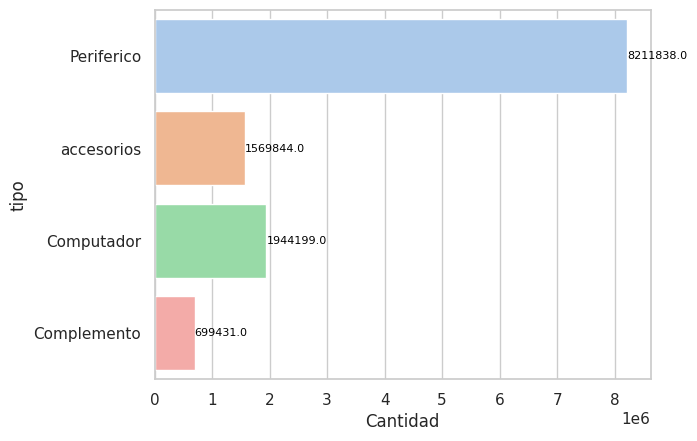

In [12]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(Tabla_CrC, x="Cantidad", y="tipo",palette="pastel")
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', xy=(width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=8, color='black')

Podemos observar que el tipo de accesorio de computadora más vendido es el periférico, con más de 8 millones de unidades y que el menos vendido son los complementos, con menos de 1 millones de unidades.

La diferencia entre el tipo más vendido y el menos vendido es de casi 8 millones de unidades, lo que indica una gran brecha en la demanda.

# Si categoria de producto se refiere al nombre general

In [13]:
Tabla_CrC2 = Tabla_Cr.copy()
# Eliminar tipo
Tabla_CrC2 = Tabla_CrC2.drop(['Producto','tipo'], axis=1)

# Agrupar por nombre_gen y sumar la cantidad
Tabla_CrC2['Cantidad'] = Tabla_CrC2.groupby('nombre_gen')['Cantidad'].transform('sum')

# Eliminar duplicados
Tabla_CrC2 = Tabla_CrC2.drop_duplicates(subset=["nombre_gen"])
Tabla_CrC2

,Cantidad,nombre_gen
0,2744576,Teclado
1,2733914,Monitor
5,2733348,Mouse
15,1569844,audifonos
16,1944199,Laptop
24,465964,Protector
25,233467,cargador


<ipython-input-14-9eaf204f6c72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(Tabla_CrC2, x="Cantidad", y="nombre_gen",palette="BuGn_r")


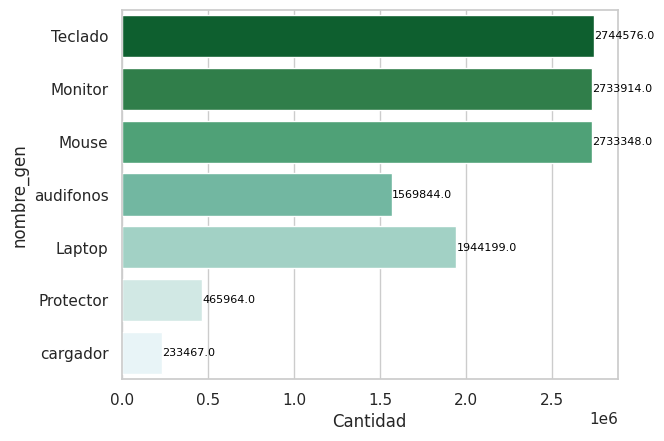

In [14]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(Tabla_CrC2, x="Cantidad", y="nombre_gen",palette="BuGn_r")
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', xy=(width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=8, color='black')

El tipo de accesorio de computadora más vendido es el teclado, el menos vendido es el cargador.


Los Mouse's y Monitores tienen una gran cantidad de demanda muy parecida entre ellos, solo estando por debajo del teclado.

## **B.** Cantidad comprada por cada cliente por producto

In [15]:
# Combinamos las tablas factura y clientes
tablaCF_merge = pd.merge(clientes, factura, on="ID_Factura")
tablaCF_merge

,ID_Cliente,ID_Factura,Producto,Cantidad
0,0,13359,basspulse,73
1,0,13359,LCD 60hz pldas,118
2,0,13359,qwertyguardian,93
3,0,13359,OLCD 60hz i3xaz,41
4,0,13359,escaper,113
...,...,...,...,...
113555,39,9751,lapjet,108
113556,39,9751,LCD 60hz pldas,77
113557,39,9751,qwertyguardian,49
113558,39,9751,TechRodent,87


In [16]:
tablaCF_merge = tablaCF_merge.drop("ID_Factura", axis=1)
tablaCF_merge

,ID_Cliente,Producto,Cantidad
0,0,basspulse,73
1,0,LCD 60hz pldas,118
2,0,qwertyguardian,93
3,0,OLCD 60hz i3xaz,41
4,0,escaper,113
...,...,...,...
113555,39,lapjet,108
113556,39,LCD 60hz pldas,77
113557,39,qwertyguardian,49
113558,39,TechRodent,87


In [17]:
import plotly.express as px # para crear gráficos interactivos

#Agrupar los datos por cliente y producto
group_factura = tablaCF_merge.groupby(['ID_Cliente', 'Producto'])['Cantidad'].sum()

# Crear un DataFrame a partir de 'group_factura' para facilitar el gráfico
df = group_factura.reset_index()

# Crear el gráfico de barras interactivas con Plotly Express
fig = px.bar(df, x='ID_Cliente', y='Cantidad', color='Producto', labels={'Cantidad': 'Cantidad de Productos'})

# Terminar de personalizar el diseño del gráfico
fig.update_layout(
    title='Cantidad de Productos Comprados por Cliente y Producto',
    xaxis_title='Cliente',
    yaxis_title='Cantidad',
    barmode='relative'  # 'relative' para barras apiladas, 'group' para barras agrupadas
)

# Muestra el gráfico interactivo
fig.show()


Esta es una grafica interactiva con la que podemos ver en cada cliente la cantidad de cada producto que ha comprado

Si en la leyenda le damos **un** click a un producto este desaparecerá de la gráfica, y si le damos dos **clicks** lo aislaremos de la gráfica para verlo individualmente.

## **E.** Haga una lista de clientes ordenada por cantidad de compras(numero de productos comprados total).

In [18]:
# Agrupa los datos por 'ID_Cliente' y suma las cantidades
total_por_cliente = tablaCF_merge.groupby('ID_Cliente')['Cantidad'].sum().reset_index()

# Ordena el DataFrame por la columna 'Cantidad' de mayor a menor
total_por_cliente = total_por_cliente.sort_values(by='Cantidad', ascending=False)
total_por_cliente

,ID_Cliente,Cantidad
31,31,290715
6,6,286949
26,26,285458
11,11,285170
29,29,282369
28,28,282172
18,18,280567
15,15,278658
19,19,278038
24,24,277726


In [19]:
# Crear un gráfico de barras interactivo con Plotly Express

fig = px.bar(total_por_cliente, x='ID_Cliente', y='Cantidad', labels={'Cantidad': 'Cantidad de Productos'})
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Terminar de personalizar el diseño del gráfico
fig.update_layout(
    title='Total de Cantidad por Cliente (Ordenado de Mayor a Menor)',
    xaxis_title='ID_Cliente',
    yaxis_title='Cantidad',
)

# Muestra el gráfico interactivo
fig.show()


Grafica interactiva con la que podemos ver en cada cliente la cantidad total de productos que ha comprado

Con ella llegamos a la conclusion que el ID_Cliente que ha comprado más productos es el 31 y que el que ha comprado menos productos es el 37

## **D.** Por cada cliente muestre sus preferencias segun sus compras

In [20]:
# Clasificar los datos por 'ID_Cliente' y 'Cantidad' de manera descendente
group_factura2 = group_factura.reset_index().sort_values(['ID_Cliente', 'Cantidad'], ascending=[True, False])

# Crear una nueva columna que enumere el Ranking 3 por cliente
group_factura2['Rank'] = group_factura2.groupby('ID_Cliente').cumcount() + 1

# Filtrar las filas con un rango de 1 a 3 (los tres productos más comprados)
top_3_productos = group_factura2[group_factura2['Rank'] <= 3]

# Mostrar los tres productos más comprados por cada cliente
print(top_3_productos)


      ID_Cliente         Producto  Cantidad  Rank
16             0       gizmoclick     13858     1
21             0        miniglide     13547     2
13             0      enterwizard     12860     3
28             1   LCD 60hz pldas     15454     1
31             1  OLCD 60hz i3xaz     14566     2
...          ...              ...       ...   ...
1028          38      Masterswipe     13826     2
1030          38  OLCD 60hz i3xaz     13439     3
1076          39   qwertyguardian     14537     1
1059          39   QLED 60hz sd56     13496     2
1077          39        shiftmate     13286     3

[120 rows x 4 columns]


In [21]:
# Crear el gráfico de barras interactivas con Plotly Express
fig = px.bar(top_3_productos, x='ID_Cliente', y='Cantidad', color='Producto', labels={'Cantidad': 'Cantidad de Productos'})

# Terminar de personalizar el diseño del gráfico
fig.update_layout(
    title='Tres Productos Más Comprados por Cliente',
    xaxis_title='Cliente',
    yaxis_title='Cantidad',
    barmode='relative'  # 'relative' para barras apiladas
)

# Muestra el gráfico interactivo
fig.show()


En la grafica podemos los 3 productos preferidos por cada cliente

El producto que mas se repite es el qwertyguardian y el que menos se repite es el LCD 30hz pb23

Al igual que la anterior grafica de barras apiladas, si en la leyenda le damos **un** click a un producto este desaparecerá de la gráfica, y si le damos dos **clicks** lo aislaremos de la gráfica para verlo individualmente.